# **Linear Regression Overview**

## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

sns.set_style("whitegrid")

## 2. Load Dataset

In [ ]:
df = pd.read_csv("student_performance.csv")
print("Dataset loaded successfully!!!")
df.head()

Dataset loaded successfully


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A


## 3. Basic Data Understanding

In [3]:
print("\n1.Data Info:\n")
df.info()


print("\n2.Missing Values:\n")
print(df.isnull().sum())


print("\n3.Statistical Summary:\n")
print(df.describe())


1.Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   student_id               1000000 non-null  int64  
 1   weekly_self_study_hours  1000000 non-null  float64
 2   attendance_percentage    1000000 non-null  float64
 3   class_participation      1000000 non-null  float64
 4   total_score              1000000 non-null  float64
 5   grade                    1000000 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 45.8+ MB

2.Missing Values:

student_id                 0
weekly_self_study_hours    0
attendance_percentage      0
class_participation        0
total_score                0
grade                      0
dtype: int64

3.Statistical Summary:

           student_id  weekly_self_study_hours  attendance_percentage  \
count  1000000.000000           1000000.000000         100

## 4. Data Cleaning

In [4]:
df = df.drop(columns=["student_id"], errors="ignore")


df = df.drop(columns=["total_score"], errors="ignore")


print("\nColumns after cleaning:\n", df.columns)


Columns after cleaning:
 Index(['weekly_self_study_hours', 'attendance_percentage',
       'class_participation', 'grade'],
      dtype='object')


## 5. Exploratory Data Analysis (EDA)

### 5.1. Grade Distribution

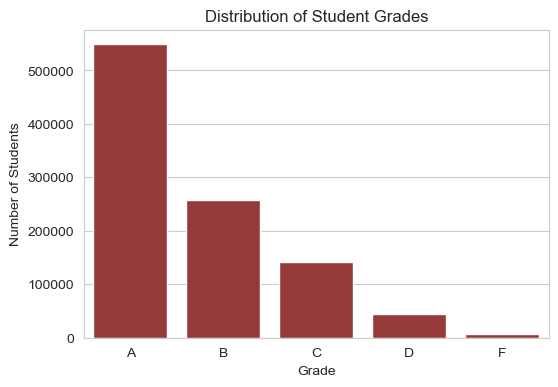

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="grade", data=df, color= 'Brown')
plt.title("Distribution of Student and Grades")
plt.xlabel("Grade")
plt.ylabel("Number of Students")
plt.show()

### 5.2. Feature Distributions

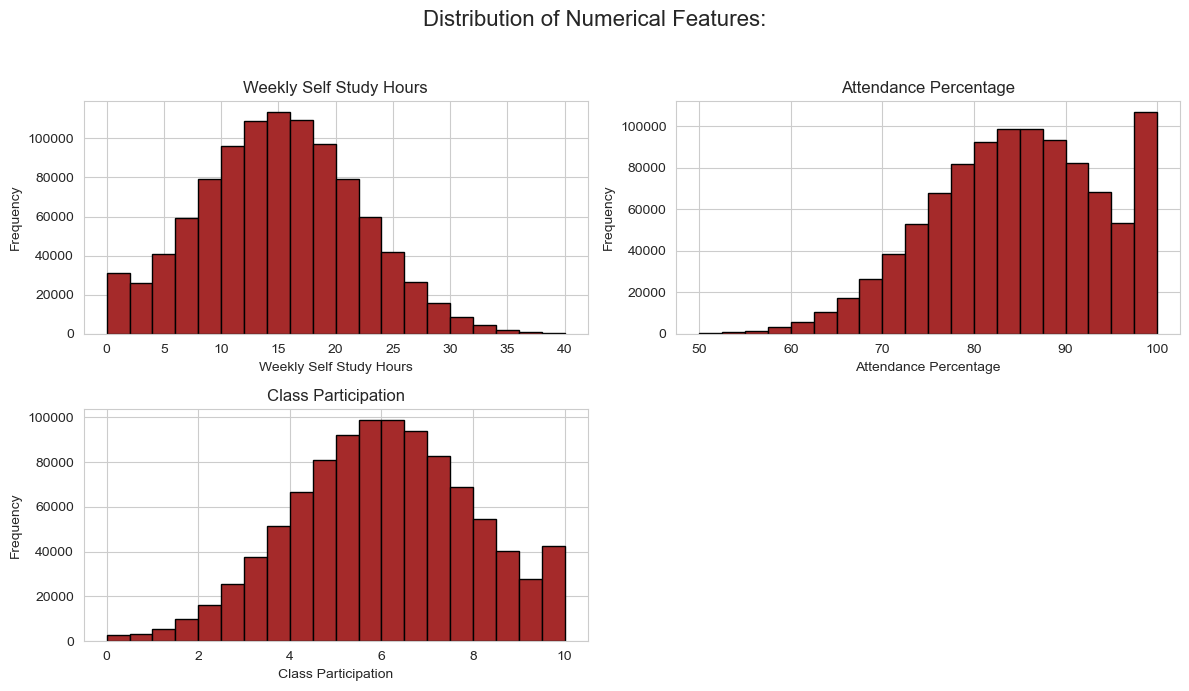

In [7]:
numeric_cols = df.drop(columns=["grade"]).columns

axes = df[numeric_cols].hist(
    figsize=(12, 7),
    bins=20,
    edgecolor="black",
    color="Brown"
)

# Add labels to each subplot
for ax, col in zip(axes.flatten(), numeric_cols):
    ax.set_title(col.replace("_", " ").title())
    ax.set_xlabel(col.replace("_", " ").title())
    ax.set_ylabel("Frequency")

plt.suptitle("Distribution of Numerical Features:", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### 5.3. Boxplots for Outlier Detection

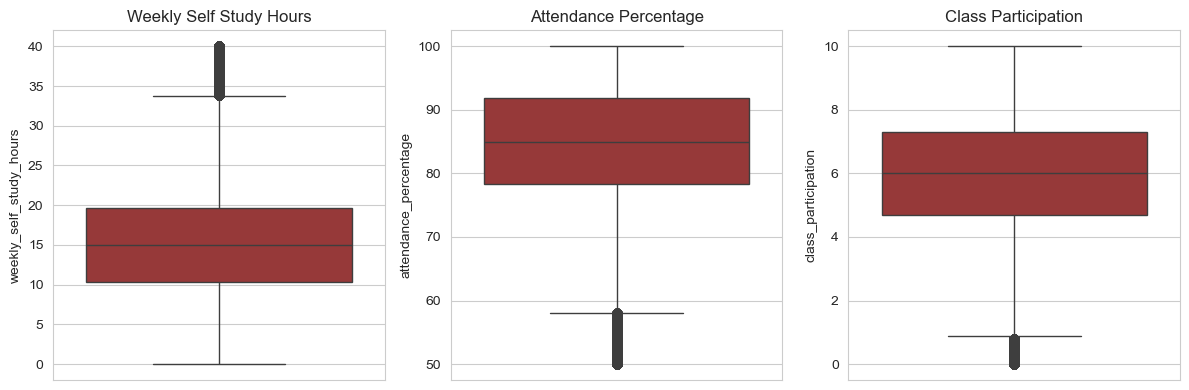

In [10]:
plt.figure(figsize=(12,4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=df[col], color="Brown")
    plt.title(col.replace("_", " ").title())

plt.tight_layout()
plt.show()

### 5.4. Relationship: Study Hours vs Grade

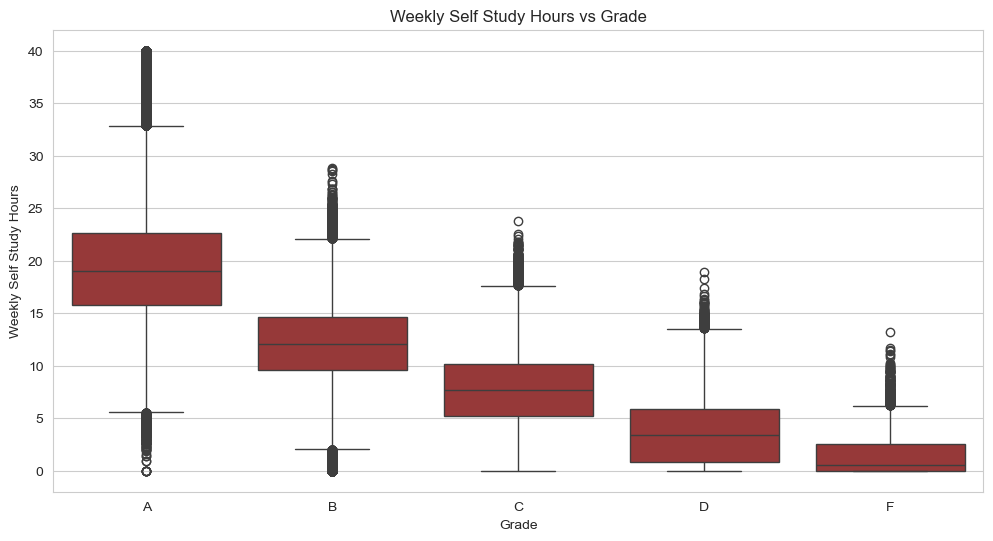

In [13]:
if "weekly_self_study_hours" in df.columns:
    plt.figure(figsize=(12,6))
    sns.boxplot(x="grade", y="weekly_self_study_hours", data=df, color="Brown")
    plt.title("Weekly Self Study Hours vs Grade")
    plt.xlabel("Grade")
    plt.ylabel("Weekly Self Study Hours")
    plt.show()